In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import os

# Exploration

## Questions

CSV's Tables broken down by their respective content. 

In [2]:
emails=pd.read_csv('/data/chewy06/output/Emails.csv', index_col='Id')

In [3]:
FOIA=pd.read_csv('/data/chewy06/output/EmailFOIA.csv', index_col='Id')

In [4]:
Extracted=pd.read_csv('/data/chewy06/output/EmailExtracted.csv', index_col='Id')

In [5]:
persons=pd.read_csv('/data/chewy06/output/Persons.csv', index_col='Id')

In [6]:
alias=pd.read_csv('/data/chewy06/output/Aliases.csv', index_col='Id')

In [7]:
recipians=pd.read_csv('/data/chewy06/output/EmailReceivers.csv', index_col='Id')

In [8]:
persons[persons.Name=='Barack Obama']

Name
Id              
14  Barack Obama

First we want to find out who received emails. The people who received the most email will be who I will be most focused on. 

In [9]:
count = { 'count':pd.Series([recipians.PersonId.value_counts()[ele] for ele in recipians['PersonId']], 
                            index=recipians.index),
        'Person Id':pd.Series([ele for ele in recipians['PersonId']], 
                              index=recipians.index)}

In [10]:
countRecipians=pd.DataFrame(count,columns=['count','Person Id'],
                            index=recipians.index)

In [11]:
countRecipians=countRecipians.drop_duplicates(keep='last')

In [12]:
mergeWithPersonName=pd.merge(countRecipians,persons,right_index=True,left_on=['Person Id'],sort=True)

In [13]:
mergeWithPersonName=mergeWithPersonName.sort_values('count',ascending=False) 

Storing dataframe as a CSV in to data directory

In [14]:
mergeWithPersonName.to_csv('/data/chewy06/output/orderNames.csv',encoding='utf-8')

Graphical representation of the Name of the person receiving emails and the number of emails they recieved. 

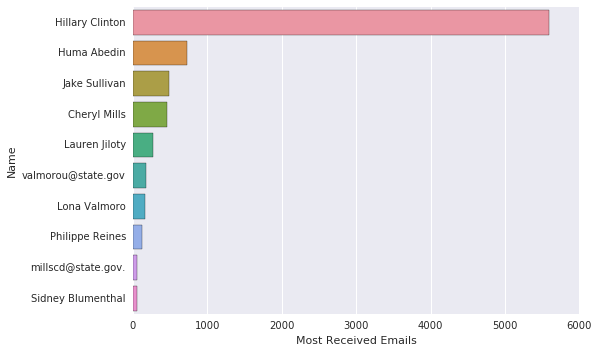

In [15]:
sns.barplot(x='count', y='Name', data=mergeWithPersonName[:10], orient="V")
plt.xlabel('Most Received Emails')

To a feel of the frequent conversation that were going on, we want to find out the most common subjects. We will find the top most subjects that occured. 

In [16]:
subject = pd.DataFrame(FOIA)

In [17]:
subject['MetadataSubject'] = subject.MetadataSubject.fillna('unknown')

In [18]:
subject['SenderPersonId'] = subject.SenderPersonId.fillna(-1)

In [19]:
count = {'Subject':pd.Series([subject.MetadataSubject.value_counts()[ele] for ele in subject['MetadataSubject']],
                    index=subject.index),
         'SubjectText': pd.Series([ele for ele in subject['MetadataSubject']], index=subject.index),
         'Sender Id': pd.Series([ele for ele in subject['SenderPersonId']], index=subject.index)}

In [20]:
subjectCount = pd.DataFrame(count, columns=['Subject','SubjectText','Sender Id'], index=subject.index)

In [21]:
subjectCount=subjectCount.drop_duplicates(keep='last')

In [22]:
subjectCount=subjectCount[subjectCount['Sender Id']!=-1]

In [23]:
subjectCount=subjectCount[subjectCount['SubjectText']!='unknown']

In [24]:
mergeSubjectCount=pd.merge(subjectCount,persons,right_index=True,left_on=['Sender Id'],sort=True)

In [25]:
tempSubCount=mergeSubjectCount.drop_duplicates('Subject')

In [26]:
tempSubCount=tempSubCount.sort_values('Subject',ascending=False) 

Graphical representation of the subject topics most discussed. 

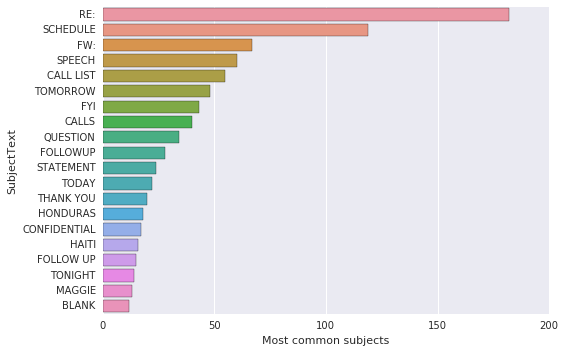

In [27]:
sns.barplot(x='Subject', y='SubjectText', data=tempSubCount[:20], orient="V")
plt.xlabel('Most common subjects')

Exploring the different content of the emails. Emails raw text can be referenced by name or subject lines.

In [28]:
def printText(text):
    print(text)

In [29]:
def getNameBodyText(name,body):
    data=pd.merge(emails,persons,right_index=True,left_on=['SenderPersonId'])
    data['MetadataTo'] = data.MetadataTo.fillna('unknown')
    extract=data[data.Name==name]
    for index, row in extract.iterrows():
        printText(row['Name'])
        printText(row[body])
        

In [30]:
def getSubjectBodyText(subject,body):
    data=pd.merge(emails,persons,right_index=True,left_on=['SenderPersonId'])
    data['MetadataTo'] = data.MetadataTo.fillna('unknown')
    extract=data[data.MetadataSubject==subject]
    for index, row in extract.iterrows():
        printText('Email sent by: ' + row['Name'])
        printText(row[body])

Exploring the different observation based on people or subject title and Name. 

In [31]:
getSubjectBodyText('CONFIDENTIAL','RawText')

Email sent by: Hillary Clinton
UNCLASSIFIED U.S. Department of State Case No. F-2014-20439 Doc No. C05758546 Date: 06/30/2015
RELEASE IN PART
B6
From:
Sent:
To:
Subject:
Pis print.
H <hrod17@clintonemail.com>
Monday, May 18, 2009 11:01 AM
'abedinh@state.gov'
Fw: confidential
Original Message
From: Cherie Blair
To: hr15@mycingularblackberry.net <hr15@mycingularblackberry.net>
Cc: H
Sent: Wed May 13 06:25:36 2009
Subject: confidential
Hilary,
You may know but for the last four years I have been working with the Qatari's and in particular with Sheikha Moser on
disability issues in Qatar and I have built up a good relationship with them
Sheikha Moser has approached me privately saying they are keen to get their relationship with the USA onto a more
positive footing and she was hoping for a "women-to women" one to one private meeting with you. She is happy to
come to Washington if you could make some time available.
Is this something you would be prepared o do. Sheikha Moser is someone who 

In [32]:
getNameBodyText('Huma Abedin','RawText')

Huma Abedin
B5
UNCLASSIFIED
U.S. Department of State
Case No. F-2015-04841
Doc No. C05739591
Date: 05/13/2015
STATE DEPT. - PRODUCED TO HOUSE SELECT BENGHAZI COMM.
SUBJECT TO AGREEMENT ON SENSITIVE INFORMATION & REDACTIONS. NO FOIA WAIVER.
RELEASE IN
PART B5
From: Abedin, Huma <AbedinH@state.goy>
Sent: Sunday, March 27, 2011 12:32 PM
To:
Cc: Sullivan, Jacob .1
Subject: Fw: chris Stevens mission
See note below
From: Davis, Timmy T
To: Abedin, Huma; Sullivan, Jacob 3; Macmanus, Joseph E; S_SpecialAssistants
Sent: Sun Mar 27 12:12:03 2011
Subject: Fw: chris stevens mission
Jake and Huma,
Please find below a status report on Chris Stevens mission to Benghazi.
Thanks.
Tim
From: Bitter, Rena
Sent: Sunday, March 27, 2011 12:00 PM
To: Davis, Timmy T
Subject: chris stevens mission
Status update on the Chris Stevens mission to Benghazi:
The current game plan is for Mr. Stevens to move no later than Wednesday from Malta to Benghazi. He will stage off
shore initially for a one day visit during whi

In [33]:
getNameBodyText('Hillary Clinton','RawText')

Hillary Clinton
B6
UNCLASSIFIED
U.S. Department of State
Case No. F-2015-04841
Doc No. C05739554
Date: 05/13/2015
STATE DEPT. - PRODUCED TO HOUSE SELECT BENGHAZI COMM.
SUBJECT TO AGREEMENT ON SENSITIVE INFORMATION & REDACTIONS. NO FOIA WAIVER.
RELEASE IN
PART B6
From:
Sent:
To:
Subject:
Attachments:
H <hrod17@clintonemail.com>
Friday, March 11, 2011 1:36 PM
Huma Abedin
Fw: H: Latest: How Syria is aiding Qaddafi and more... Sid
hrc memo syria aiding libya 030311.docx
Pis print.
From:
Sent: Thursday, March 03, 2011 09:45 PM
To: H
Subject: H: Latest: How Syria is aiding Qaddafi and more... Sid
CONFIDENTIAL
March 3, 2011
For: Hillary
From: Sid
Re: Syria aiding Qaddafi
This memo has two parts. Part one is the report that Syria is providing air support for Qaddafi. Part two is a note
to Cody from Lord David Owen, former UK foreign secretary on his views of an increasingly complex crisis. It
seems that the situation is developing into a protracted civil war with various nations backing opposi

In [34]:
keys=['benghazi','war','libya','terrorist','classified','confidential','syria','quaddafi']

In [35]:
def digEmailBodyText(keys=keys):
    for key in keys:
        for index, row in emails.iterrows():
            text=row['RawText'].split(' ')
            if(key.lower() in [item.lower() for item in text]):
                printText(row['RawText'])
    
    

In [36]:
digEmailBodyText(['terrorist'])

UNCLASSIFIED
U.S. Department of State
Case No. F-2015-04841
Doc No. C05739610
Date: 05/13/2015
STATE DEPT. - PRODUCED TO HOUSE SELECT BENGHAZI COMM.
SUBJECT TO AGREEMENT ON SENSITIVE INFORMATION & REDACTIONS. NO FOIA WAIVER.
RELEASE IN
FULL
From: H < hrod17@clintonemail.com>-
Sent: Sunday, September 30, 2012 10:17 PM
To: Oscar Flores
Subject Fw: Benhazi/protest statements
Attachments: Compiled protest and Benghazi statements.doc:x
Pis print.
From: Sullivan, Jacob 3 [mailto:Sullivan13@stategov]
Sent Monday, September 24, 2012 10:16 AM
To: 11
Subject: Fw: Benhazi/protest statements
Attached is full compilation. You never said spontaneous or characterized the motives, in fact you were careful in your
first statement to say we were assessing motive and method. The way you treated the video in the Libya context was to
say that some sought to *justify* the attack on that basis.
From: Valliani, Amira
Sent: Monday, September 24, 2012 10:08 AM
To: Sullivan, Jacob 3
Subject: Benhazi/protest stat